# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Train-data-load" data-toc-modified-id="Train-data-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Train data load</a></div><div class="lev2 toc-item"><a href="#Data-preparation" data-toc-modified-id="Data-preparation-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data preparation</a></div><div class="lev3 toc-item"><a href="#Imputting-missing-values" data-toc-modified-id="Imputting-missing-values-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Imputting missing values</a></div><div class="lev1 toc-item"><a href="#Model-selection" data-toc-modified-id="Model-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model selection</a></div><div class="lev2 toc-item"><a href="#Feature-selection" data-toc-modified-id="Feature-selection-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature selection</a></div><div class="lev2 toc-item"><a href="#Evaluating--single-classifiers" data-toc-modified-id="Evaluating--single-classifiers-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Evaluating  single classifiers</a></div><div class="lev3 toc-item"><a href="#Random-Forest" data-toc-modified-id="Random-Forest-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Random Forest</a></div><div class="lev3 toc-item"><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Logistic Regression</a></div><div class="lev3 toc-item"><a href="#XGBoost" data-toc-modified-id="XGBoost-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>XGBoost</a></div><div class="lev1 toc-item"><a href="#Predictions-on-test-set" data-toc-modified-id="Predictions-on-test-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predictions on test set</a></div><div class="lev2 toc-item"><a href="#Missing-values-imputation-and-feature-engineering" data-toc-modified-id="Missing-values-imputation-and-feature-engineering-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Missing values imputation and feature engineering</a></div><div class="lev2 toc-item"><a href="#Predict-on-test-and-output-submission" data-toc-modified-id="Predict-on-test-and-output-submission-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Predict on test and output submission</a></div>

In [1]:
import os
from datetime import datetime

import pandas as pd

from scipy.stats import ttest_ind 

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import xgboost
from xgboost import XGBClassifier

C:\Users\sg0892454\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Train data load

In [3]:
d = pd.read_csv('datasets' + os.sep + 'train.csv', na_values=-1)

In [4]:
d.shape

(595212, 59)

In [5]:
n_rows = d.shape[0];

In [6]:
d.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


Drop _id_ column

In [7]:
del d['id']

In [8]:
d.columns.values

array(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],

How much missing data do we have?

In [9]:
d.isnull().shape

(595212, 58)

All examples have at least one missing feature.
What are the missing features?

In [10]:
columns_with_na = d.columns[d.isnull().any()].tolist()
columns_with_na

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

Let's create dummies for all categorical variables, that __do not__ have missing values (we have to yet impute the missing values). We create dummies now, because first we will need then in main model anyway and second we will need then in models predicting missing values in other predictor columns.   

In [11]:
categorical_columns = [col for col in d.columns if col.endswith('_cat') and col not in columns_with_na]
d = pd.get_dummies(d, columns=categorical_columns, drop_first=True);

In [12]:
d.columns.values

array(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12',
       'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin',
       'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'ps_car_04_cat_1', 'ps_car_04_cat_2',
       'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_0

How much classes are in balance?

In [13]:
d.groupby('target').size() / d.shape[0]

target
0    0.963552
1    0.036448
dtype: float64

Claims are filled for __3.64%__ policies.

__TODO__: try oversampling, later.

## Data preparation
### Imputting missing values
Let's go thru all features with missing values one by one, and determine simple imputation strategy that makes most sense at first glance.

For every feature with missing data we will look into:
1. Distribution of non-missing data of that features
2. Is data _missingness_ related to filling the claim more often? (We suspect Missing At Random - MAR).
3. Is it possible to build a model (regression for numerical and classification for categorical) to train it on filled examples and use to predict missing values?
4. Or determine what other imputation strategy can we use. 

Some utilities that we will use while looking at data:

In [14]:
columns_with_na_categorical = [c for c in columns_with_na if c.endswith('_cat')]
columns_with_na_numeric = [c for c in columns_with_na if not c.endswith('_cat')]

In [15]:
def print_stats(col):
    missing_cnt = d[d[col].isnull()].shape[0]
    print('Missing values: {:.2f}%'.format(100 * missing_cnt / n_rows))
    print('Missing count: {}'.format(missing_cnt))
    if col.endswith('_cat'):
        print(d.groupby(col).size())
    else:
        print(d[col].describe())

In [16]:
def ttest(col):
    ttest = ttest_ind(d[d[col].isnull()].target, d[d[col].notnull()].target, equal_var=False)
    print(col + ': ' + str(ttest))

In [17]:
def fillWithMean(col, df=d):
    df.fillna({col: df[col].mean()}, inplace=True);
    
def fillWithMode(col, df=d):
    df.fillna({col: df[col].mode()[0]}, inplace=True); # mode() returns a one element series

Regression model to fill missing oridinal and continuous data

In [18]:
def predict_missing(estimator, dependent_col, df=d):
    columns_with_na = df.columns[df.isnull().any()].tolist()
    predictor_cols = [c for c in df.columns if c not in columns_with_na and c != dependent_col and c != 'target']
    d_rows_na = df[df[dependent_col].isnull()]
    d_rows_no_na = df[df[dependent_col].notnull()]
    estimator.fit(d_rows_no_na[predictor_cols], d_rows_no_na[dependent_col])
    predicted = estimator.predict(d_rows_na[predictor_cols])
    cv_scores = cross_validate(estimator, d_rows_no_na[predictor_cols], d_rows_no_na[dependent_col], n_jobs=-1, return_train_score=False)['test_score']
    return predicted, cv_scores

Let's go thru all features one by one:

In [19]:
columns_with_na_numeric

['ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_14']

__ps_reg_03__

In [20]:
print_stats('ps_reg_03')

Missing values: 18.11%
Missing count: 107772
count    487440.000000
mean          0.894047
std           0.345413
min           0.061237
25%           0.633443
50%           0.801561
75%           1.083974
max           4.037945
Name: ps_reg_03, dtype: float64


In [21]:
predicted, errs = predict_missing(estimator=LinearRegression(), dependent_col = 'ps_reg_03')
errs

array([ 0.58979078,  0.58974565,  0.5908621 ])

In [22]:
ttest('ps_reg_03')

ps_reg_03: Ttest_indResult(statistic=-17.084176466711412, pvalue=2.1967860501784655e-65)


There is correlation b/w data missingness and positive class. What is the distribution of data for positive class for non-missing values?

In [23]:
d[d['target']==1]['ps_reg_03'].describe()

count    18634.000000
mean         0.952534
std          0.362817
min          0.253722
25%          0.673146
50%          0.865303
75%          1.170937
max          3.197753
Name: ps_reg_03, dtype: float64

Values are higher. But not much. Use regression model for now, for lack of better idea:

In [24]:
d.loc[d['ps_reg_03'].isnull(), 'ps_reg_03'] = predicted

__ps_car_11__

In [25]:
print_stats('ps_car_11')

Missing values: 0.00%
Missing count: 5
count    595207.000000
mean          2.346100
std           0.832495
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: ps_car_11, dtype: float64


It is only 5 missing values. Does not matter much anyway.

In [26]:
predicted, errs = predict_missing(estimator=LinearRegression(), dependent_col = 'ps_car_11')
errs

array([ 0.62483844,  0.62346877,  0.62302226])

In [27]:
ttest('ps_car_11')

ps_car_11: Ttest_indResult(statistic=-150.04856101232082, pvalue=0.0)


Regression is not accurate, but let's fill from regression:

In [28]:
d.loc[d['ps_car_11'].isnull(), 'ps_car_11'] = predicted

__ps_car_12__

In [29]:
print_stats('ps_car_12')

Missing values: 0.00%
Missing count: 1
count    595211.000000
mean          0.379947
std           0.058300
min           0.100000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: ps_car_12, dtype: float64


Only 1 missing value.

In [30]:
predicted, errs = predict_missing(estimator=LinearRegression(), dependent_col = 'ps_car_12')
errs

array([ 0.86845126,  0.87186644,  0.87124669])

Quite good regression accuracy.

In [31]:
d.loc[d['ps_car_12'].isnull(), 'ps_car_12'] = predicted

__ps_reg_14__

In [32]:
print_stats('ps_car_14')

Missing values: 7.16%
Missing count: 42620
count    552592.000000
mean          0.374691
std           0.045610
min           0.109545
25%           0.350428
50%           0.373497
75%           0.398121
max           0.636396
Name: ps_car_14, dtype: float64


In [33]:
predicted, errs = predict_missing(estimator=LinearRegression(), dependent_col = 'ps_car_14')
errs

array([ 0.55605333,  0.55983837,  0.560154  ])

Very poor regression accuracy, fill with mean:

In [34]:
fillWithMean('ps_car_14')

And now let's go thru all categorical  features missing

In [35]:
columns_with_na_categorical

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat']

__ps_ind_02_cat__

In [36]:
print_stats('ps_ind_02_cat')

Missing values: 0.04%
Missing count: 216
ps_ind_02_cat
1.0    431859
2.0    123573
3.0     28186
4.0     11378
dtype: int64


In [37]:
# predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_ind_02_cat')
# print(predicted, errs)

What is the distribution for positive target class?

In [38]:
d[d['target']==1].groupby('ps_ind_02_cat').size()

ps_ind_02_cat
1.0    15428
2.0     4713
3.0     1049
4.0      464
dtype: int64

Classifier accuracy not very good,  filling with mode for a moment. Also the number of samples with that feature missing is not very big.

In [39]:
fillWithMode('ps_ind_02_cat')

__ps_ind_04_cat__

In [40]:
print_stats('ps_ind_04_cat')

Missing values: 0.01%
Missing count: 83
ps_ind_04_cat
0.0    346965
1.0    248164
dtype: int64


In [41]:
d[d['target']==1].groupby('ps_ind_04_cat').size()

ps_ind_04_cat
0.0    12071
1.0     9590
dtype: int64

In [42]:
# predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_ind_04_cat')
# print(predicted, errs)

Classifier accuracy was poor, filling with mode

In [43]:
fillWithMode('ps_ind_04_cat')

__ps_ind_05_cat__

In [44]:
print_stats('ps_ind_05_cat')

Missing values: 0.98%
Missing count: 5809
ps_ind_05_cat
0.0    528009
1.0      8322
2.0      4184
3.0      8233
4.0     18344
5.0      1649
6.0     20662
dtype: int64


In [45]:
predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_ind_05_cat')
print(predicted, errs)

[ 0.  0.  6. ...,  0.  0.  0.] [ 0.81001171  0.81006576  0.81104013]


In [46]:
d.loc[d['ps_ind_05_cat'].isnull(), 'ps_ind_05_cat'] = predicted

__ps_car_01_cat__

In [47]:
print_stats('ps_car_01_cat')

Missing values: 0.02%
Missing count: 107
ps_car_01_cat
0.0       5904
1.0       1367
2.0       2144
3.0       6658
4.0      26174
5.0      18142
6.0      62393
7.0     179247
8.0      15093
9.0      20323
10.0     50087
11.0    207573
dtype: int64


In [48]:
# predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_car_01_cat')
# print(predicted, errs)

Very poor accuracy, fill with mode.

In [49]:
fillWithMode('ps_car_01_cat')

__ps_car_02_cat__

In [50]:
print_stats('ps_car_02_cat')

Missing values: 0.00%
Missing count: 5
ps_car_02_cat
0.0    101217
1.0    493990
dtype: int64


In [51]:
predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_car_02_cat')
print(predicted, errs)

[ 0.  0.  1.  1.  0.] [ 0.9598998   0.95990968  0.95953166]


In [52]:
d.loc[d['ps_car_02_cat'].isnull(), 'ps_car_02_cat'] = predicted

__ps_car_03_cat__

In [53]:
print_stats('ps_car_03_cat')

Missing values: 69.09%
Missing count: 411231
ps_car_03_cat
0.0     73272
1.0    110709
dtype: int64


Most data is missing here. What is data distribution in positive target class?

In [54]:
d[d['target']==1].groupby('ps_car_03_cat').size()

ps_car_03_cat
0.0    2897
1.0    5347
dtype: int64

Seems very influencing..
Are we able to build any reliable classifier from other features?

In [55]:
predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_car_03_cat')
print(predicted, errs)

[ 1.  0.  0. ...,  0.  0.  1.] [ 0.73672281  0.73678804  0.7355977 ]


In [56]:
d.loc[d['ps_car_03_cat'].isnull(), 'ps_car_03_cat'] = predicted

__ps_car_05_cat__

In [57]:
print_stats('ps_car_05_cat')

Missing values: 44.78%
Missing count: 266551
ps_car_05_cat
0.0    155994
1.0    172667
dtype: int64


In [58]:
d[d['target']==1].groupby('ps_car_05_cat').size()

ps_car_05_cat
0.0    6257
1.0    6985
dtype: int64

In [59]:
# predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_car_05_cat')
# print(predicted, errs)

Poor classifier accuracy.

__Do not use that feature__. Too many items missing, and does not seem to have any correlation to target class.

In [60]:
del d['ps_car_05_cat']

__ps_car_07_cat__

In [61]:
print_stats('ps_car_07_cat')

Missing values: 1.93%
Missing count: 11489
ps_car_07_cat
0.0     30575
1.0    553148
dtype: int64


In [62]:
predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_car_07_cat')
print(predicted, errs)

[ 1.  1.  1. ...,  1.  1.  1.] [ 0.92342798  0.92343312  0.92403879]


In [63]:
d.loc[d['ps_car_07_cat'].isnull(), 'ps_car_07_cat'] = predicted

__ps_car_09_cat__

In [64]:
print_stats('ps_car_09_cat')

Missing values: 0.10%
Missing count: 569
ps_car_09_cat
0.0    194518
1.0     29080
2.0    353482
3.0     14756
4.0      2807
dtype: int64


In [65]:
# predicted, errs = predict_missing(DecisionTreeClassifier(), 'ps_car_09_cat')
# errs

Poor classifier accuracy, fill with mode

In [66]:
fillWithMode('ps_car_09_cat')

Have we handled all missing data?

In [67]:
columns_with_na = d.columns[d.isnull().any()].tolist()
assert not columns_with_na

Now we can create dumies also for the categorical variables that had missing values.

In [68]:
d = pd.get_dummies(d, columns=[c for c in columns_with_na_categorical if c != 'ps_car_05_cat'], drop_first=True);

# Model selection

## Feature selection
What are features correlations?

In [69]:
binary_features = [c for c in d.columns if '_bin' in c]
binary_ind_features = [c for c in binary_features if '_ind_' in c]
binary_calc_features = [c for c in binary_features if '_calc_' in c]
categorical_features = [c for c in d.columns if '_cat' in c and '_calc_' not in c]
numeric_features = [c for c in d.columns if c not in binary_features and c not in categorical_features and '_calc_' not in c and c!='target']

Draw correlation matrix

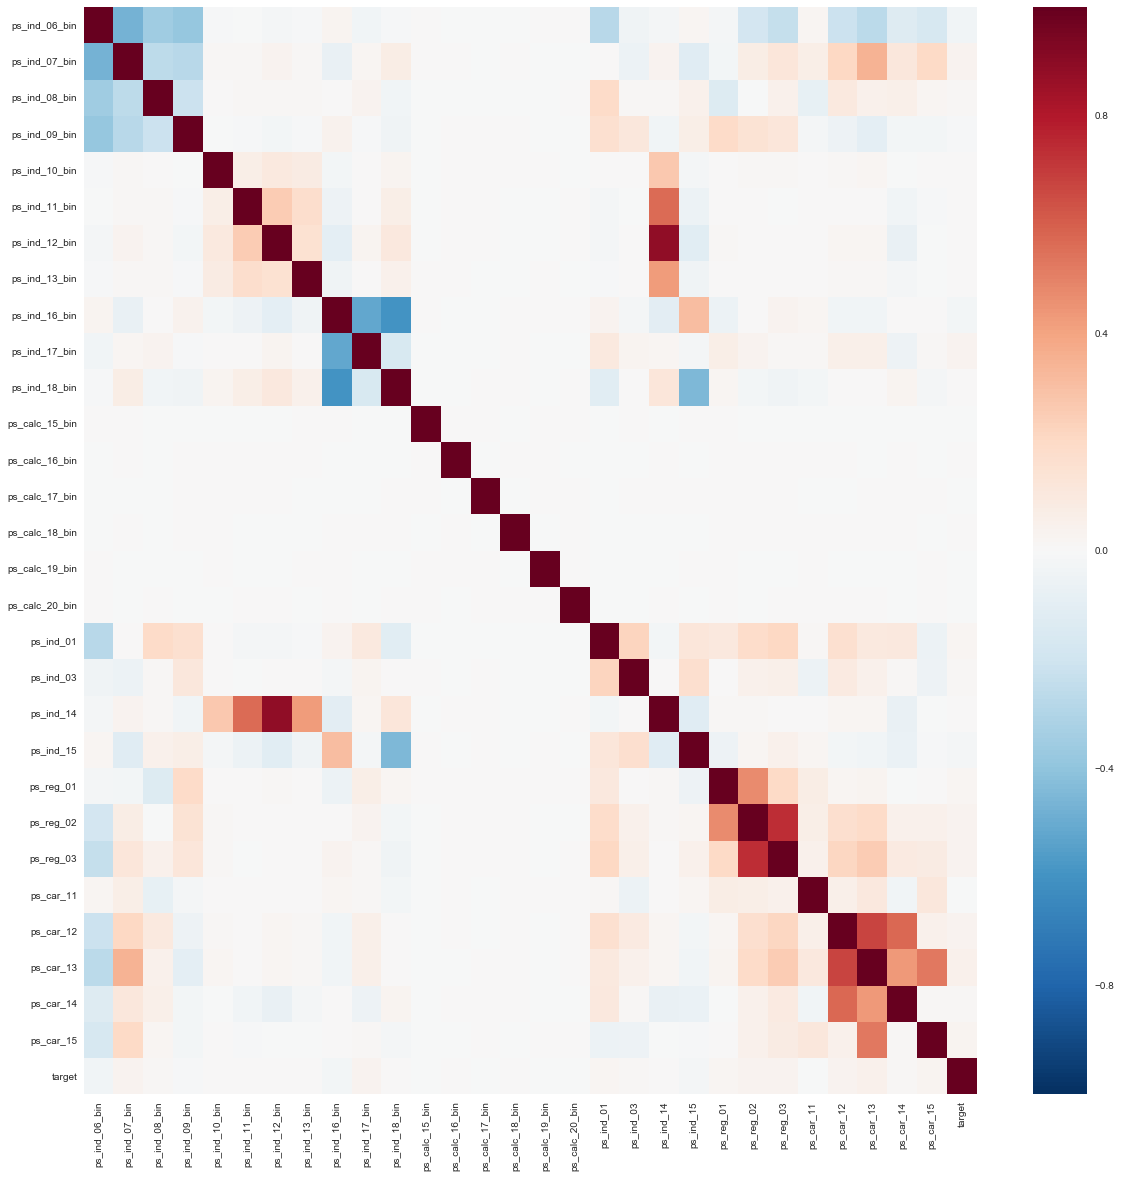

In [70]:
corr = d[binary_features + numeric_features + ['target']].corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, ax=ax, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

We can see strong correlations for couple of features, let's zoom into them

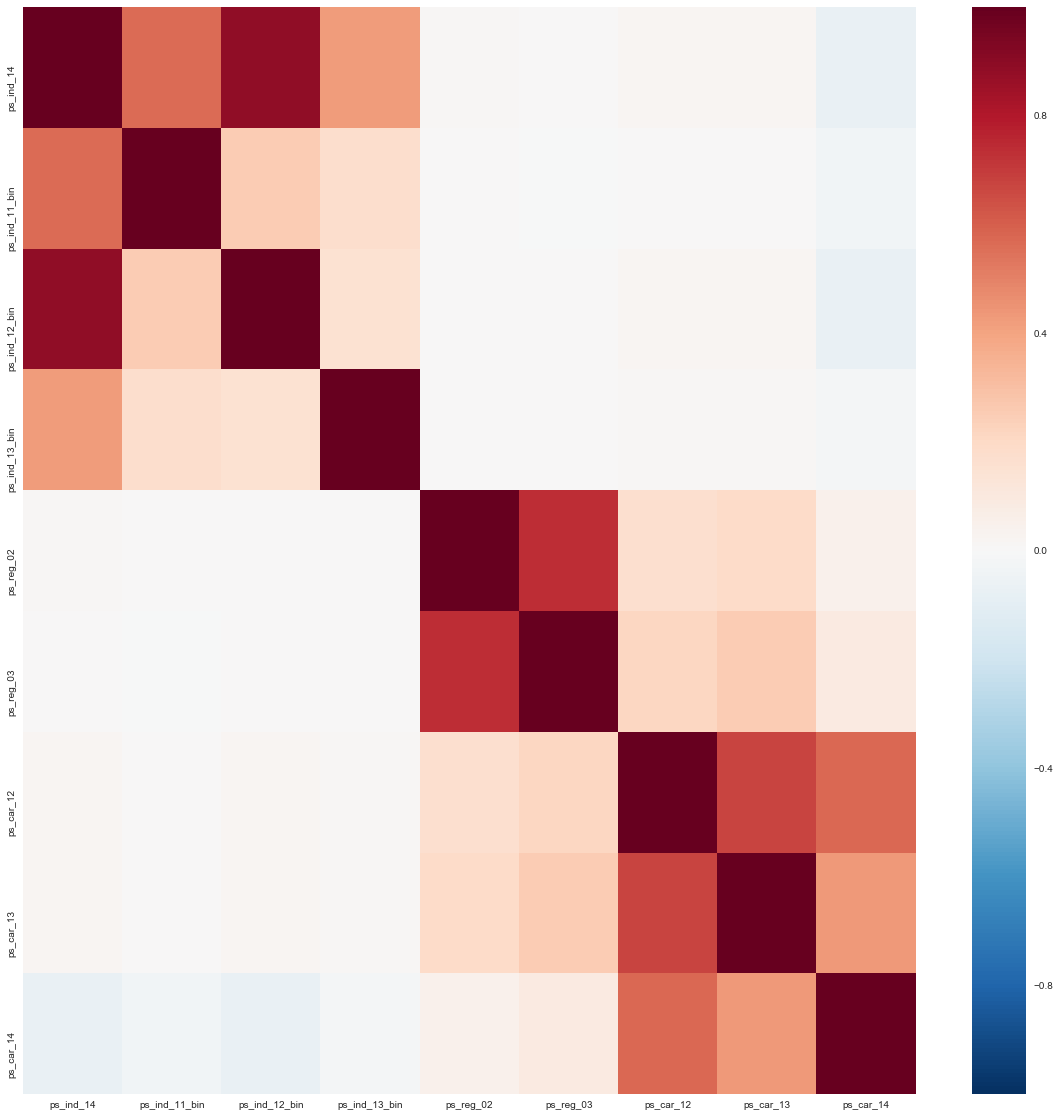

In [71]:
high_correlations = d[['ps_ind_14', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']].corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(high_correlations, ax=ax, 
            xticklabels=high_correlations.columns.values,
            yticklabels=high_correlations.columns.values)
plt.show()

We will have to somehow merge that features (PCA?)

What are the correlations of binary and numerical columns to the target variable?

In [72]:
corr['target']

ps_ind_06_bin    -0.034017
ps_ind_07_bin     0.034218
ps_ind_08_bin     0.013147
ps_ind_09_bin    -0.008237
ps_ind_10_bin     0.001815
ps_ind_11_bin     0.002028
ps_ind_12_bin     0.007810
ps_ind_13_bin     0.002460
ps_ind_16_bin    -0.027778
ps_ind_17_bin     0.037053
ps_ind_18_bin     0.004555
ps_calc_15_bin   -0.000490
ps_calc_16_bin    0.000624
ps_calc_17_bin   -0.000170
ps_calc_18_bin    0.000552
ps_calc_19_bin   -0.001744
ps_calc_20_bin   -0.001072
ps_ind_01         0.018570
ps_ind_03         0.008360
ps_ind_14         0.007443
ps_ind_15        -0.021506
ps_reg_01         0.022888
ps_reg_02         0.034800
ps_reg_03         0.034346
ps_car_11        -0.001219
ps_car_12         0.038800
ps_car_13         0.053899
ps_car_14         0.011203
ps_car_15         0.027667
target            1.000000
Name: target, dtype: float64

We clearly see that _calc_ featrues do not correlate at all - they will not be taken as features. Some other features have also minimal correlation. They will be eliminated by PCA method later anyway.

What features are the most important by PCA method?

In [73]:
pca = PCA()
features = [c for c in d.columns if c != 'target']
pca.fit(d[features]);

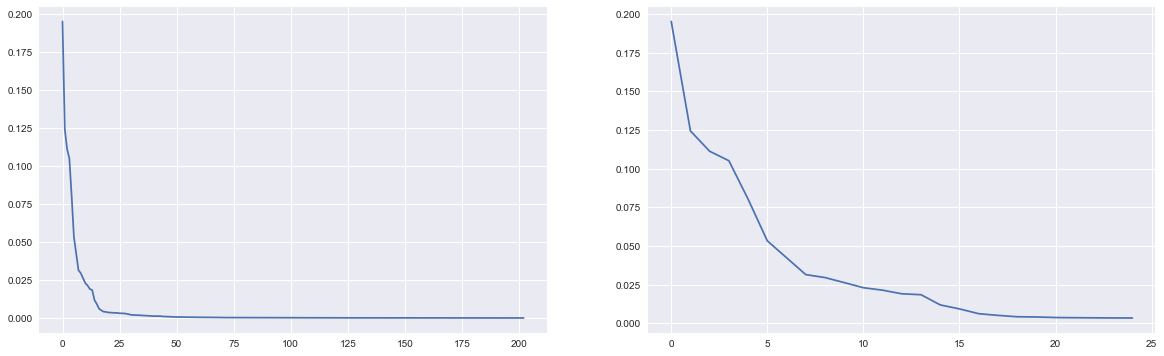

In [74]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(pca.explained_variance_ratio_)
ax2.plot(pca.explained_variance_ratio_[:25])
plt.show()

In [75]:
pca.components_

array([[ -1.25762334e-01,  -2.86579651e-01,   1.86571205e-03, ...,
         -5.33278016e-03,  -5.61973562e-05,   8.56107332e-05],
       [ -3.90571660e-04,   3.75173099e-03,  -2.19811456e-04, ...,
          3.05172622e-04,   1.10136954e-06,  -1.57667916e-05],
       [ -4.36157786e-03,  -9.59055897e-03,   3.05148223e-04, ...,
         -3.96379571e-05,  -3.65962953e-05,  -6.55966766e-05],
       ..., 
       [  2.61614838e-05,   3.15450357e-05,   4.41042626e-05, ...,
          1.88410874e-04,   2.66733998e-04,   9.87803886e-04],
       [ -1.65636591e-15,  -5.64676446e-16,  -4.98860350e-01, ...,
          2.77555756e-16,  -2.77555756e-17,  -9.02056208e-17],
       [ -0.00000000e+00,   1.23421338e-16,   3.37394595e-02, ...,
          3.60822483e-16,  -2.22044605e-16,   2.22044605e-16]])

## Evaluating  single classifiers

The final model performance metric will be Gini index. 

However we cannot pass that function to cross_validate / grid_search routines, as that routines run in parallel and it is not possible to pickle a function (without much complication). Instead our target metric will be just Area Under ROC, as gini index is directly proportional to it. Only at the very end we will compute gini normalized, in one thread. 

In [76]:
def gini(y, pred):
    fpr, tpr, thr = roc_curve(y, pred, pos_label=1)
    g = 2 * auc(fpr, tpr) -1
    return g

def gini_norm(y, pred):
    normed = gini(y, pred) / gini(y,y)
    return normed

In [77]:
features = binary_ind_features + categorical_features + numeric_features
X = d[features]
y = d['target']

In [78]:
# def gini(actual, pred):
#     assert (len(actual) == len(pred))
#     all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
#     all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
#     totalLosses = all[:, 0].sum()
#     giniSum = all[:, 0].cumsum().sum() / totalLosses

#     giniSum -= (len(actual) + 1) / 2.
#     return giniSum / len(actual)


# def gini_normalized(actual, pred):
#     return gini(actual, pred) / gini(actual, actual)

### Random Forest

In [79]:
# classifier = Pipeline([
#     ('pca', PCA()),
#     ('tree', RandomForestClassifier(n_estimators=50, class_weight = 'balanced'))
# ])

# grid_search_CV = GridSearchCV(classifier, {
#     'pca__n_components': [25, 50, 100],
#     'tree__min_samples_split': [1000, 5000, 10000],
# }, n_jobs=7, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring=make_scorer(roc_auc_score), verbose=10)

# grid_search_CV.fit(X, y)

# grid_search_CV.best_params_, grid_search_CV.best_score_

# # {'pca__n_components': 25,
# #  'tree__class_weight': 'balanced',
# #  'tree__min_samples_split': 10}

In [80]:
# classifier = Pipeline([
#     ('tree', RandomForestClassifier(n_estimators=50, class_weight = 'balanced', criterion='entropy', min_samples_split=5000))
# ])

# grid_search_CV = GridSearchCV(classifier, {
#     'tree__min_samples_split': [3000, 5000, 7000, 9000],
#     'tree__max_features': [13, 14, 15]
# }, n_jobs=7, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring=make_scorer(roc_auc_score), verbose=10)

# grid_search_CV.fit(X, y)

# grid_search_CV.best_params_

### Logistic Regression

In [81]:
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# grid_search_CV = GridSearchCV(LogisticRegression(class_weight='balanced'), {
#     'C': np.arange(0.001, 0.01, 0.001)
# }, n_jobs=-1, cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(roc_auc_score), verbose=10)

# grid_search_CV.fit(X, y)

# grid_search_CV.best_params_, grid_search_CV.best_score_

In [82]:
# cross_validate(LogisticRegression(class_weight = 'balanced', C=0.002), X, y, n_jobs=1, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring=make_scorer(roc_auc_score))
# cross_validate(LogisticRegression(class_weight = 'balanced', C=0.002), X, y, n_jobs=1, cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(gini_norm))
# # roc_auc_score round 0.59, corresponsing to gini of 0.18

In [83]:
# trees = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', criterion='entropy', min_samples_split=5000, n_jobs=-1)
# cross_validate(trees, X, y, n_jobs=1, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring=make_scorer(gini_norm))
# gini of 0.18

### XGBoost

In [84]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=3, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgboost.DMatrix(dtrain[predictors].values, label=dtrain['target'].values)
        cvresult = xgboost.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("Accuracy : %.4g" % accuracy_score(dtrain['target'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['target'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [85]:
# xgb1 = XGBClassifier(learning_rate=0.05, n_estimators=1000, max_depth=3, min_child_weight=2, gamma=0.01, reg_alpha=10,
#                                             subsample=0.9, colsample_bytree=0.9, objective='binary:logistic')

# modelfit(xgb1, d, features)

In [86]:
# grid_search_CV = GridSearchCV(XGBClassifier(learning_rate=0.2, n_estimators=150, max_depth=3, min_child_weight=2, gamma=0.01, reg_alpha=10,
#                                             subsample=0.9, colsample_bytree=0.9, objective='binary:logistic'), {
#     'reg_alpha':[20, 50, 150]
# }, n_jobs=-1, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='roc_auc', verbose=10)

# grid_search_CV.fit(X, y)

# grid_search_CV.best_params_, grid_search_CV.best_score_

In [87]:
# classifier = XGBClassifier(learning_rate=0.05, n_estimators=750, max_depth=3, min_child_weight=2, gamma=0.01, reg_alpha=10,
#                                             subsample=0.9, colsample_bytree=0.9, objective='binary:logistic')
# cross_validate(classifier, X, y, n_jobs=1, cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(gini_norm))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classifier = XGBClassifier(learning_rate=0.05, n_estimators=750, max_depth=3, min_child_weight=2, gamma=0.01, reg_alpha=10,
                                            subsample=0.9, colsample_bytree=0.9, objective='binary:logistic')
classifier.fit(X_train, y_train)

y_pred = classifier.predict_proba(X_test)[:,1]

In [89]:
gini_norm(y_test, y_pred)
# 0.2837

0.2838136733884089

# Predictions on test set

In [90]:
d_test = pd.read_csv('datasets' + os.sep + 'test.csv', na_values=-1)

In [91]:
d_test.shape

(892816, 58)

## Missing values imputation and feature engineering

In [92]:
submission = pd.DataFrame()
submission['id'] = d_test['id']
del d_test['id']

In [93]:
d_test = pd.get_dummies(d_test, columns=categorical_columns, drop_first=True);

In [94]:
def fillFromModel(colname, df, estimator):
    if df[colname].isnull().values.any():
        predicted, _ = predict_missing(estimator, dependent_col = colname, df=df)
        df.loc[d_test[colname].isnull(), colname] = predicted

In [95]:
fillFromModel('ps_reg_03', d_test, LinearRegression())
fillFromModel('ps_car_11', d_test, LinearRegression())
fillFromModel('ps_car_12', d_test, LinearRegression())

fillWithMean('ps_car_14', d_test)
fillWithMode('ps_ind_02_cat', d_test)
fillWithMode('ps_ind_04_cat', d_test)

fillFromModel('ps_ind_05_cat', d_test, DecisionTreeClassifier())

fillWithMode('ps_car_01_cat', d_test)

fillFromModel('ps_car_02_cat', d_test, DecisionTreeClassifier())
fillFromModel('ps_car_03_cat', d_test, DecisionTreeClassifier())

del d_test['ps_car_05_cat']

fillFromModel('ps_car_07_cat', d_test, DecisionTreeClassifier())

fillWithMode('ps_car_09_cat', d_test)

d_test = pd.get_dummies(
    d_test,
    columns=[c for c in columns_with_na_categorical if c != 'ps_car_05_cat'],
    drop_first=True)

Any other NAs in test?

In [96]:
test_set_columns_with_na = d_test.columns[d_test.isnull().any()].tolist()
assert not test_set_columns_with_na

## Predict on test and output submission

In [97]:
submission['target'] = classifier.predict_proba(d_test[features])[:,1]

In [98]:
date_time_stamp = datetime.now().strftime('%Y_%m_%d__%H_%M_%S')
submission.to_csv('submissions' + os.sep + 'submission_' + date_time_stamp + '.csv', float_format='%.4f', index=False)